In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [20]:
for i in range(45):
    if i==0:
        train = pd.read_pickle('salida/nuevo4f/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [21]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,2.096701,0.000000,0.000000,0.000000,0.000000,0.000000,4.584342,0.000561,0.959007,...,0,8,0.857143,0.000000,0,,0,,0.800000,CONTRADICTION
1,1.183962,1.912939,1.378783,3.886845,0.005261,0.299131,0.073846,4.385955,0.001464,0.787925,...,1,7,0.875000,0.506052,0,,0,,0.333333,CONTRADICTION
2,0.000000,2.176234,0.000000,0.000000,0.000000,0.000000,0.000000,4.551917,0.000832,0.942610,...,0,7,1.000000,0.000000,0,,0,,0.400000,ENTAILMENT
3,1.278412,1.909126,1.684184,3.834346,0.006025,0.180114,0.077934,4.168479,0.002797,0.478862,...,4,5,0.375000,0.136465,0,,0,,0.333333,CONTRADICTION
4,1.176827,2.183393,2.056290,3.847619,0.005217,0.287820,0.118928,4.060155,0.003064,0.465865,...,6,7,0.375000,0.065691,0,,0,,0.166667,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,1.352706,1.052941,0.811278,3.786475,0.006455,0.084316,0.020937,3.924434,0.003752,0.224118,...,4,3,0.166667,0.083317,0,,0,,0.200000,CONTRADICTION
4435,1.373320,1.384432,1.384432,3.779084,0.008525,0.056842,0.024570,3.779084,0.006149,0.056842,...,4,3,0.250000,0.000000,0,,1,play,0.000000,CONTRADICTION
4436,1.265558,1.687640,1.687640,3.742518,0.005599,0.195824,0.059651,3.742518,0.004020,0.195824,...,6,5,0.000000,0.000000,0,,0,,0.000000,CONTRADICTION
4437,1.298727,1.410848,1.459148,3.685267,0.004270,0.156616,0.059745,4.094972,0.002200,0.435175,...,1,6,0.333333,0.207085,0,,0,,0.333333,CONTRADICTION


In [22]:
train["entropias"]=train["entropias"]-train["entropia_total"]

<Axes: title={'center': 'entropias'}, xlabel='clases'>

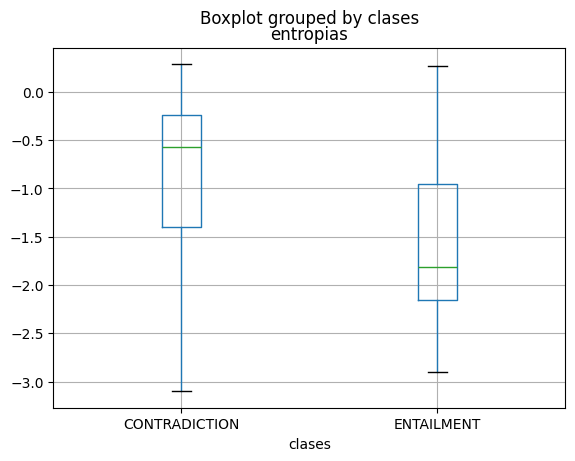

In [23]:
train.boxplot(by="clases",column="entropias")

<Axes: title={'center': 'entropias'}, xlabel='clases'>

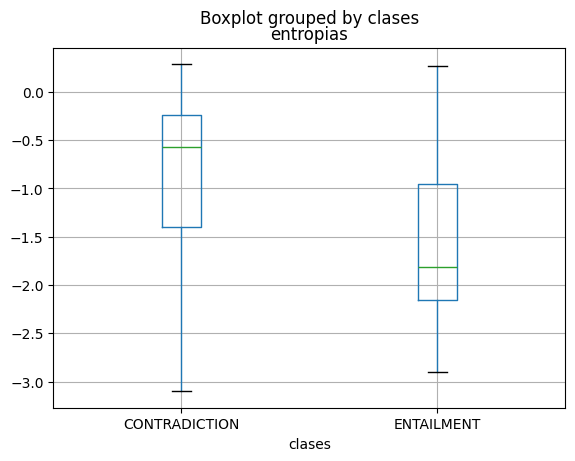

In [24]:
train.boxplot(by="clases",column="entropias")

<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>

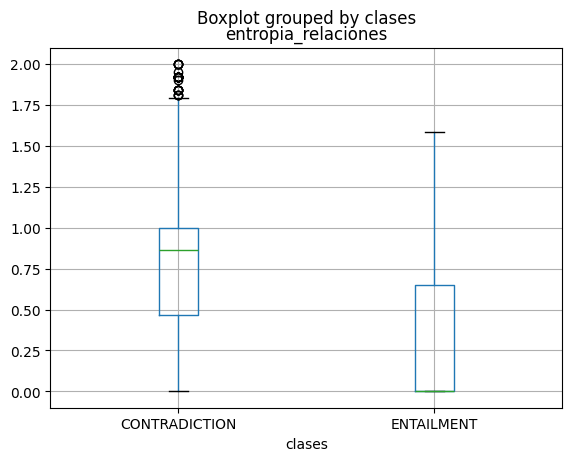

In [25]:
train.boxplot(by="clases",column="entropia_relaciones")

In [26]:
train["list_m"]=train["list_m"]/train["list_M"]

<Axes: title={'center': 'list_m'}, xlabel='clases'>

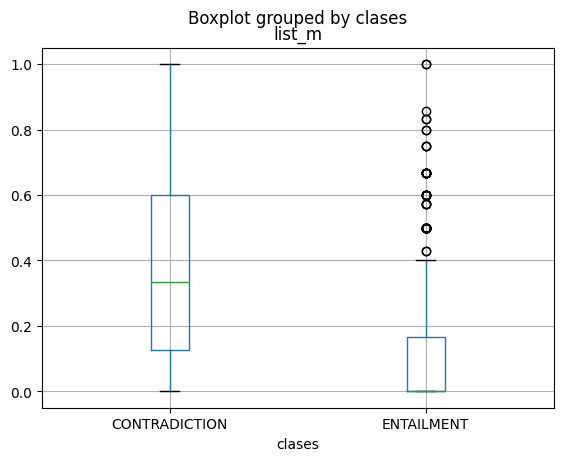

In [27]:
train.boxplot(by="clases",column="list_m")

## Eliminar características

In [28]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["verbH","verbT","entropia_total","list_M"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,sumas_t,...,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,0.000000,-2.096701,0.000000,0.000000,0.000000,0.000000,4.584342,0.000561,0.959007,0.198408,...,0,0.000000,0.000000,8,0.857143,0.000000,0,0,0.800000,CONTRADICTION
1,1.183962,-0.534155,3.886845,0.005261,0.299131,0.073846,4.385955,0.001464,0.787925,0.172313,...,0,0.543564,0.125000,7,0.875000,0.506052,0,0,0.333333,CONTRADICTION
2,0.000000,-2.176234,0.000000,0.000000,0.000000,0.000000,4.551917,0.000832,0.942610,0.219983,...,0,0.000000,0.000000,7,1.000000,0.000000,0,0,0.400000,ENTAILMENT
3,1.278412,-0.224942,3.834346,0.006025,0.180114,0.077934,4.168479,0.002797,0.478862,0.156421,...,0,1.405639,0.500000,5,0.375000,0.136465,0,0,0.333333,CONTRADICTION
4,1.176827,-0.127102,3.847619,0.005217,0.287820,0.118928,4.060155,0.003064,0.465865,0.150256,...,1,1.405639,0.750000,7,0.375000,0.065691,0,0,0.166667,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,1.352706,-0.241663,3.786475,0.006455,0.084316,0.020937,3.924434,0.003752,0.224118,0.071298,...,0,0.918296,0.666667,3,0.166667,0.083317,0,0,0.200000,CONTRADICTION
4435,1.373320,0.000000,3.779084,0.008525,0.056842,0.024570,3.779084,0.006149,0.056842,0.024570,...,0,0.000000,1.000000,3,0.250000,0.000000,0,1,0.000000,CONTRADICTION
4436,1.265558,0.000000,3.742518,0.005599,0.195824,0.059651,3.742518,0.004020,0.195824,0.059651,...,1,1.459148,1.000000,5,0.000000,0.000000,0,0,0.000000,CONTRADICTION
4437,1.298727,0.048300,3.685267,0.004270,0.156616,0.059745,4.094972,0.002200,0.435175,0.091135,...,0,0.918296,0.333333,6,0.333333,0.207085,0,0,0.333333,CONTRADICTION


In [29]:
train.columns

Index(['distancias', 'entropias', 'mutinf', 'mearts', 'max_info', 'sumas',
       'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t', 'list_comp',
       'diferencias', 'list_incomp', 'entropia_relaciones', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

In [30]:
import scipy.stats as stats
for c in train.columns[:-1]:
    # Datos de las calificaciones de los dos grupos
    grupo_a = train[(train['clases']=="CONTRADICTION")][c]
    grupo_b = train[(train['clases']=="ENTAILMENT")][c]

    # Realizamos una prueba t de dos muestras independientes
    t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_b)

    # Establecemos un nivel de significancia (alfa)
    alfa = 0.001

    # Comprobamos si rechazamos la hipótesis nula
    if p_valor < alfa:
        print("Hay una diferencia significativa entre los grupos.",c,p_valor)
    else:
        print("No hay evidencia de una diferencia significativa entre los grupos.",c)

Hay una diferencia significativa entre los grupos. distancias 1.54276171710508e-218
Hay una diferencia significativa entre los grupos. entropias 1.2904490166673333e-175
Hay una diferencia significativa entre los grupos. mutinf 7.306094943567356e-204
Hay una diferencia significativa entre los grupos. mearts 7.724566767764732e-142
Hay una diferencia significativa entre los grupos. max_info 6.502575347315327e-52
Hay una diferencia significativa entre los grupos. sumas 7.510547298601087e-43
Hay una diferencia significativa entre los grupos. mutinf_t 5.165687710053435e-156
Hay una diferencia significativa entre los grupos. mearts_t 1.5745878914197382e-147
Hay una diferencia significativa entre los grupos. max_info_t 4.284805969643624e-197
Hay una diferencia significativa entre los grupos. sumas_t 5.052979351918616e-103
Hay una diferencia significativa entre los grupos. list_comp 3.4805037063883097e-09
Hay una diferencia significativa entre los grupos. diferencias 5.870366371167559e-153
Hay 

In [31]:
#train=train[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]

In [32]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [33]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [34]:
train_m

,distancias,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,sumas_t,...,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
distancias,1.000000,0.820488,0.969891,0.862731,0.516602,0.491226,-0.648253,0.635426,-0.718486,-0.561754,...,0.653747,0.237808,0.846200,0.745955,0.034429,-0.560716,0.549677,-0.091942,0.184362,-0.564182
entropias,0.820488,1.000000,0.862140,0.703645,0.660935,0.600691,-0.634233,0.613006,-0.662804,-0.536699,...,0.675036,0.376100,0.809362,0.797044,0.041373,-0.564817,0.272134,-0.057613,0.055906,-0.576321
mutinf,0.969891,0.862140,1.000000,0.825440,0.701572,0.649682,-0.620772,0.603941,-0.651880,-0.517370,...,0.633627,0.349548,0.877064,0.746801,0.063940,-0.529313,0.588518,-0.091344,0.147156,-0.549903
mearts,0.862731,0.703645,0.825440,1.000000,0.465932,0.443796,-0.628354,0.722451,-0.640589,-0.470373,...,0.601296,0.259246,0.753464,0.679071,-0.035966,-0.494139,0.496291,-0.085591,0.096875,-0.510255
max_info,0.516602,0.660935,0.701572,0.465932,1.000000,0.904111,-0.332109,0.317669,-0.198983,-0.175008,...,0.327612,0.533997,0.640173,0.462300,0.119819,-0.233568,0.502684,-0.051532,-0.031493,-0.298441
sumas,0.491226,0.600691,0.649682,0.443796,0.904111,1.000000,-0.336717,0.327843,-0.204370,-0.039246,...,0.353289,0.402603,0.602302,0.448396,-0.054729,-0.253955,0.518900,-0.063254,-0.036975,-0.301079
mutinf_t,-0.648253,-0.634233,-0.620772,-0.628354,-0.332109,-0.336717,1.000000,-0.917468,0.913332,0.612282,...,-0.734423,-0.216094,-0.665560,-0.819880,0.105131,0.702140,-0.052622,0.071584,-0.030792,0.836804
mearts_t,0.635426,0.613006,0.603941,0.722451,0.317669,0.327843,-0.917468,1.000000,-0.889605,-0.584371,...,0.742605,0.241790,0.652101,0.815710,-0.154524,-0.680241,0.057936,-0.081598,0.000140,-0.809497
max_info_t,-0.718486,-0.662804,-0.651880,-0.640589,-0.198983,-0.204370,0.913332,-0.889605,1.000000,0.712485,...,-0.792777,-0.152028,-0.658786,-0.857132,0.096554,0.746366,-0.025902,0.073673,-0.061371,0.825274
sumas_t,-0.561754,-0.536699,-0.517370,-0.470373,-0.175008,-0.039246,0.612282,-0.584371,0.712485,1.000000,...,-0.516658,-0.152868,-0.487133,-0.608079,-0.444787,0.467425,0.063497,-0.009996,-0.036007,0.534315


<Axes: >

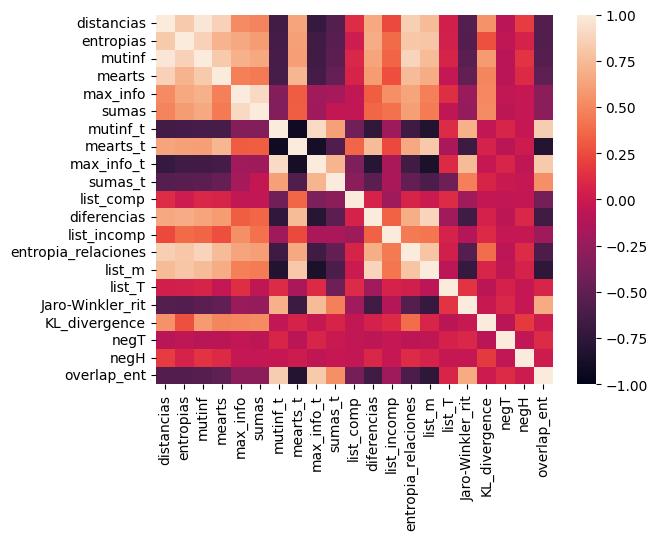

In [35]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [36]:
train_m.columns

Index(['distancias', 'entropias', 'mutinf', 'mearts', 'max_info', 'sumas',
       'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t', 'list_comp',
       'diferencias', 'list_incomp', 'entropia_relaciones', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [37]:
train_m

,distancias,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,sumas_t,...,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
distancias,1.000000,0.820488,0.969891,0.862731,0.516602,0.491226,-0.648253,0.635426,-0.718486,-0.561754,...,0.653747,0.237808,0.846200,0.745955,0.034429,-0.560716,0.549677,-0.091942,0.184362,-0.564182
entropias,0.820488,1.000000,0.862140,0.703645,0.660935,0.600691,-0.634233,0.613006,-0.662804,-0.536699,...,0.675036,0.376100,0.809362,0.797044,0.041373,-0.564817,0.272134,-0.057613,0.055906,-0.576321
mutinf,0.969891,0.862140,1.000000,0.825440,0.701572,0.649682,-0.620772,0.603941,-0.651880,-0.517370,...,0.633627,0.349548,0.877064,0.746801,0.063940,-0.529313,0.588518,-0.091344,0.147156,-0.549903
mearts,0.862731,0.703645,0.825440,1.000000,0.465932,0.443796,-0.628354,0.722451,-0.640589,-0.470373,...,0.601296,0.259246,0.753464,0.679071,-0.035966,-0.494139,0.496291,-0.085591,0.096875,-0.510255
max_info,0.516602,0.660935,0.701572,0.465932,1.000000,0.904111,-0.332109,0.317669,-0.198983,-0.175008,...,0.327612,0.533997,0.640173,0.462300,0.119819,-0.233568,0.502684,-0.051532,-0.031493,-0.298441
sumas,0.491226,0.600691,0.649682,0.443796,0.904111,1.000000,-0.336717,0.327843,-0.204370,-0.039246,...,0.353289,0.402603,0.602302,0.448396,-0.054729,-0.253955,0.518900,-0.063254,-0.036975,-0.301079
mutinf_t,-0.648253,-0.634233,-0.620772,-0.628354,-0.332109,-0.336717,1.000000,-0.917468,0.913332,0.612282,...,-0.734423,-0.216094,-0.665560,-0.819880,0.105131,0.702140,-0.052622,0.071584,-0.030792,0.836804
mearts_t,0.635426,0.613006,0.603941,0.722451,0.317669,0.327843,-0.917468,1.000000,-0.889605,-0.584371,...,0.742605,0.241790,0.652101,0.815710,-0.154524,-0.680241,0.057936,-0.081598,0.000140,-0.809497
max_info_t,-0.718486,-0.662804,-0.651880,-0.640589,-0.198983,-0.204370,0.913332,-0.889605,1.000000,0.712485,...,-0.792777,-0.152028,-0.658786,-0.857132,0.096554,0.746366,-0.025902,0.073673,-0.061371,0.825274
sumas_t,-0.561754,-0.536699,-0.517370,-0.470373,-0.175008,-0.039246,0.612282,-0.584371,0.712485,1.000000,...,-0.516658,-0.152868,-0.487133,-0.608079,-0.444787,0.467425,0.063497,-0.009996,-0.036007,0.534315


In [38]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,distancias,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,sumas_t,...,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
distancias,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
entropias,0.820488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mutinf,0.969891,0.862140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mearts,0.862731,0.703645,0.825440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
max_info,0.516602,0.660935,0.701572,0.465932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
sumas,0.491226,0.600691,0.649682,0.443796,0.904111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mutinf_t,-0.648253,-0.634233,-0.620772,-0.628354,-0.332109,-0.336717,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mearts_t,0.635426,0.613006,0.603941,0.722451,0.317669,0.327843,-0.917468,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
max_info_t,-0.718486,-0.662804,-0.651880,-0.640589,-0.198983,-0.204370,0.913332,-0.889605,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
sumas_t,-0.561754,-0.536699,-0.517370,-0.470373,-0.175008,-0.039246,0.612282,-0.584371,0.712485,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0


In [39]:
coor.idxmax()

distancias                          mutinf
entropias                           mutinf
mutinf                 entropia_relaciones
mearts                 entropia_relaciones
max_info                             sumas
sumas                  entropia_relaciones
mutinf_t                        max_info_t
mearts_t                            list_m
max_info_t                     overlap_ent
sumas_t                        overlap_ent
list_comp                           list_T
diferencias                         list_m
list_incomp            entropia_relaciones
entropia_relaciones                 list_m
list_m                       KL_divergence
list_T                    Jaro-Winkler_rit
Jaro-Winkler_rit               overlap_ent
KL_divergence                         negH
negT                           overlap_ent
negH                           overlap_ent
overlap_ent                     distancias
dtype: object

In [40]:
coor.max()

distancias             0.969891
entropias              0.862140
mutinf                 0.877064
mearts                 0.753464
max_info               0.904111
sumas                  0.602302
mutinf_t               0.913332
mearts_t               0.815710
max_info_t             0.825274
sumas_t                0.534315
list_comp              0.108846
diferencias            0.882599
list_incomp            0.439963
entropia_relaciones    0.795363
list_m                 0.074515
list_T                 0.144282
Jaro-Winkler_rit       0.667018
KL_divergence          0.175513
negT                   0.106775
negH                   0.003750
overlap_ent            0.000000
dtype: float64

In [41]:
coor.idxmin()

distancias                   max_info_t
entropias                    max_info_t
mutinf                       max_info_t
mearts                       max_info_t
max_info                       mutinf_t
sumas                          mutinf_t
mutinf_t                       mearts_t
mearts_t                     max_info_t
max_info_t                       list_m
sumas_t                          list_m
list_comp                   overlap_ent
diferencias            Jaro-Winkler_rit
list_incomp                 overlap_ent
entropia_relaciones         overlap_ent
list_m                      overlap_ent
list_T                    KL_divergence
Jaro-Winkler_rit                   negH
KL_divergence                      negT
negT                               negH
negH                         distancias
overlap_ent                  distancias
dtype: object

In [42]:
coor.min()

distancias            -0.718486
entropias             -0.662804
mutinf                -0.651880
mearts                -0.640589
max_info              -0.332109
sumas                 -0.336717
mutinf_t              -0.917468
mearts_t              -0.889605
max_info_t            -0.857132
sumas_t               -0.608079
list_comp             -0.398755
diferencias           -0.662773
list_incomp           -0.209268
entropia_relaciones   -0.599538
list_m                -0.753806
list_T                -0.080526
Jaro-Winkler_rit      -0.032978
KL_divergence         -0.081692
negT                  -0.047197
negH                   0.000000
overlap_ent            0.000000
dtype: float64

In [43]:
cols=train_m.columns

In [44]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

entropias distancias 0.8204880377320356
mutinf distancias 0.9698906310452939
mutinf entropias 0.8621396025945537
mearts distancias 0.8627305907248376
mearts entropias 0.7036447110485693
mearts mutinf 0.8254395997738393
max_info mutinf 0.7015719802463865
sumas max_info 0.9041111220713582
mearts_t mearts 0.7224509544388322
max_info_t mutinf_t 0.913331948438599
sumas_t max_info_t 0.7124847289983511
diferencias mearts_t 0.7426048648699832
entropia_relaciones distancias 0.8462003408024126
entropia_relaciones entropias 0.8093621316568741
entropia_relaciones mutinf 0.8770640764000569
entropia_relaciones mearts 0.753463644267187
list_m distancias 0.7459553514145865
list_m entropias 0.7970443554284724
list_m mutinf 0.7468008210719437
list_m mearts_t 0.8157104401919969
list_m diferencias 0.8825994191447385
list_m entropia_relaciones 0.7953634707286976
Jaro-Winkler_rit mutinf_t 0.702140358882408
Jaro-Winkler_rit max_info_t 0.7463657814922011
overlap_ent mutinf_t 0.8368038805589347
overlap_ent max

In [45]:
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

mearts_t mutinf_t -0.9174676432481536
max_info_t distancias -0.7184861929265247
max_info_t mearts_t -0.8896050819047241
diferencias mutinf_t -0.7344225369998709
diferencias max_info_t -0.792776687662175
list_m mutinf_t -0.8198803911796033
list_m max_info_t -0.8571323948666327
Jaro-Winkler_rit list_m -0.7111928541722785
overlap_ent mearts_t -0.8094974096930918
overlap_ent list_m -0.7538057163766606


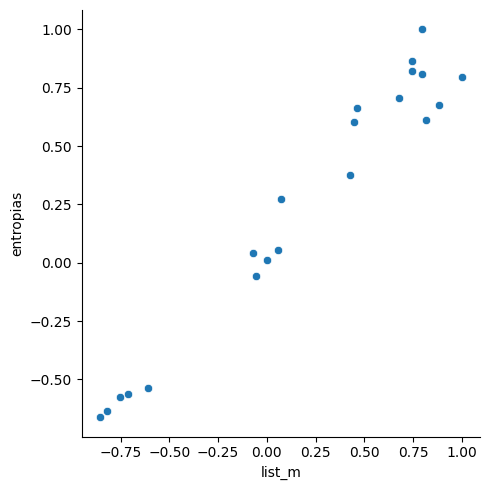

In [46]:
# Checar variables colineales
sns.relplot(data=train_m, x="list_m", y="entropias")

In [47]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [48]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    else:
        y_train.append(0)

In [49]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

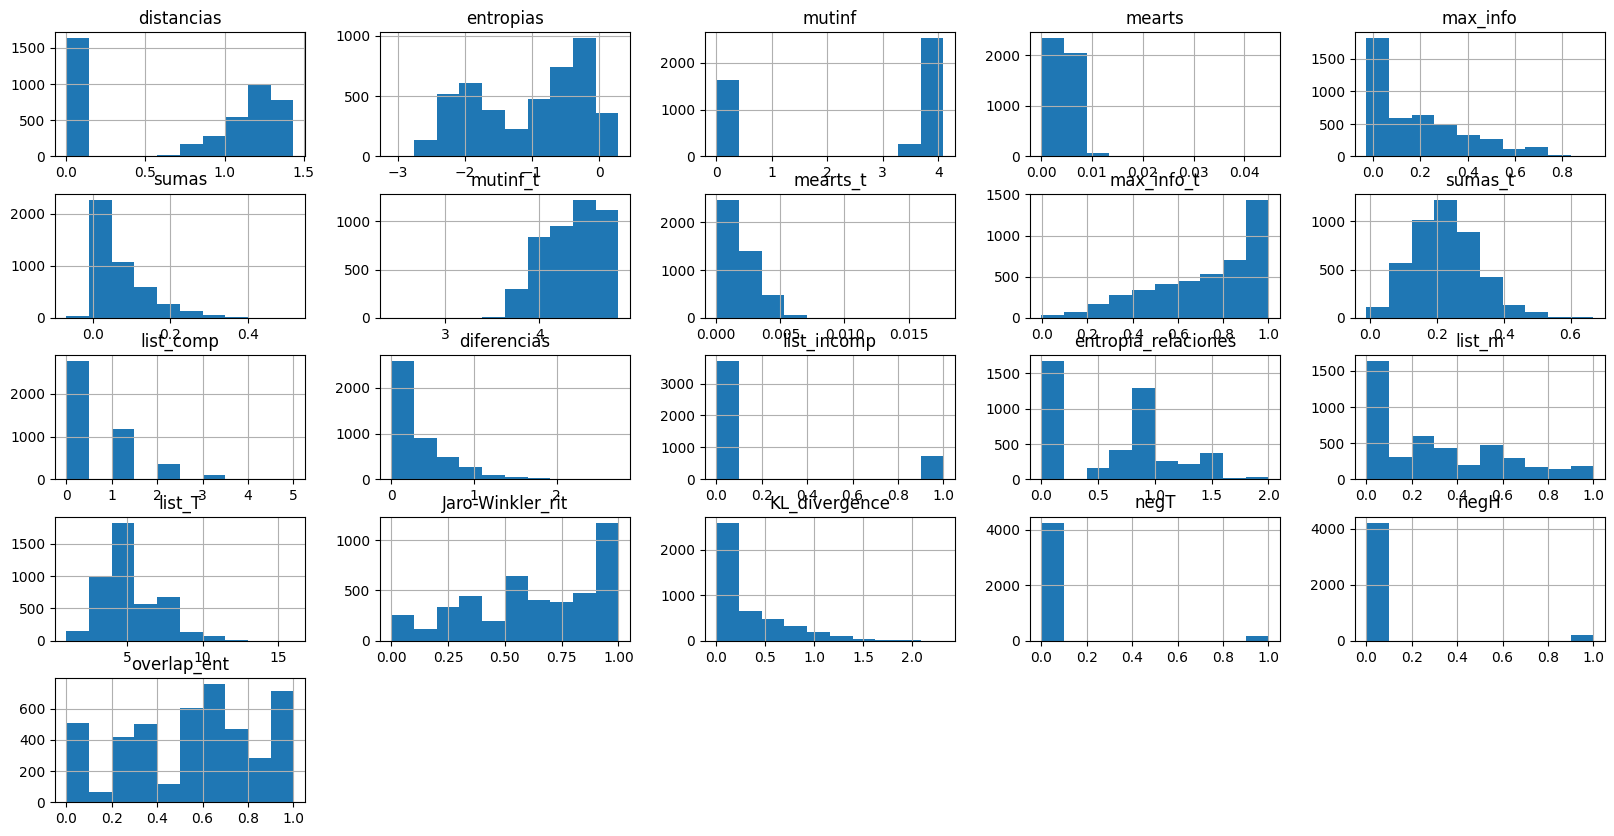

In [50]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [51]:
for i in range(50):
    if i==0:
        test = pd.read_pickle('salida/nuevo4f/SICK/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/SICK/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [52]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,1.269651,2.089354,1.685475,3.811686,0.005501,0.190288,0.084758,4.041253,0.003165,0.448079,...,4,5,0.375000,0.232775,0,,0,,0.000000,CONTRADICTION
1,1.327605,2.017728,1.263809,3.855514,0.005729,0.118164,0.051589,4.217714,0.002422,0.578176,...,2,7,0.571429,0.249111,0,,0,,0.666667,CONTRADICTION
2,1.344318,1.950857,1.094914,3.814045,0.005747,0.096256,0.052614,4.088408,0.002828,0.490766,...,2,7,0.428571,0.412795,0,,0,,0.333333,CONTRADICTION
3,0.000000,1.881168,0.000000,0.000000,0.000000,0.000000,0.000000,4.683008,0.000000,1.000000,...,0,8,1.000000,0.000000,0,,0,,1.000000,ENTAILMENT
4,1.360140,1.610893,0.985228,3.978109,0.006914,0.074974,0.029070,4.574526,0.000698,0.867853,...,1,7,0.857143,0.277387,0,,0,,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,1.330689,1.919241,1.471602,3.803848,0.005847,0.114092,0.033093,4.076415,0.003201,0.335569,...,3,5,0.250000,0.174667,0,,0,,0.250000,CONTRADICTION
4902,1.368506,1.578898,1.156780,3.769402,0.005909,0.063093,-0.001446,3.770053,0.004144,0.122140,...,2,5,0.250000,0.157848,0,,0,,0.000000,CONTRADICTION
4903,1.328831,0.747585,0.668564,3.698120,0.005845,0.112530,0.024140,3.697886,0.004207,0.101417,...,4,4,0.000000,0.014334,0,,0,,0.000000,CONTRADICTION
4904,1.309634,1.392618,1.232660,3.809083,0.006834,0.142375,0.071880,3.848196,0.004763,0.146788,...,6,6,0.125000,0.036298,0,,0,,0.000000,CONTRADICTION


In [53]:
test["entropias"]=test["entropias"]/test["entropia_total"]
test["list_m"]=test["list_m"]/test["list_M"]

In [54]:
test=test.drop(["verbH","verbT","entropia_total","list_M"],axis=1)
test

,distancias,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,sumas_t,...,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,1.269651,0.806697,3.811686,0.005501,0.190288,0.084758,4.041253,0.003165,0.448079,0.160300,...,0,1.000000,0.500000,5,0.375000,0.232775,0,0,0.000000,CONTRADICTION
1,1.327605,0.626353,3.855514,0.005729,0.118164,0.051589,4.217714,0.002422,0.578176,0.157771,...,0,0.863121,0.285714,7,0.571429,0.249111,0,0,0.666667,CONTRADICTION
2,1.344318,0.561248,3.814045,0.005747,0.096256,0.052614,4.088408,0.002828,0.490766,0.135732,...,0,0.863121,0.285714,7,0.428571,0.412795,0,0,0.333333,CONTRADICTION
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.683008,0.000000,1.000000,0.184760,...,0,0.000000,0.000000,8,1.000000,0.000000,0,0,1.000000,ENTAILMENT
4,1.360140,0.611604,3.978109,0.006914,0.074974,0.029070,4.574526,0.000698,0.867853,0.180280,...,0,0.591673,0.142857,7,0.857143,0.277387,0,0,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,1.330689,0.766763,3.803848,0.005847,0.114092,0.033093,4.076415,0.003201,0.335569,0.096200,...,0,0.811278,0.750000,5,0.250000,0.174667,0,0,0.250000,CONTRADICTION
4902,1.368506,0.732650,3.769402,0.005909,0.063093,-0.001446,3.770053,0.004144,0.122140,0.023929,...,0,1.000000,0.500000,5,0.250000,0.157848,0,0,0.000000,CONTRADICTION
4903,1.328831,0.894299,3.698120,0.005845,0.112530,0.024140,3.697886,0.004207,0.101417,0.024478,...,0,1.370951,0.800000,4,0.000000,0.014334,0,0,0.000000,CONTRADICTION
4904,1.309634,0.885139,3.809083,0.006834,0.142375,0.071880,3.848196,0.004763,0.146788,0.063966,...,0,1.298795,0.750000,6,0.125000,0.036298,0,0,0.000000,CONTRADICTION


In [55]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
#test=test[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]
test

,distancias,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,sumas_t,...,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,1.269651,0.806697,3.811686,0.005501,0.190288,0.084758,4.041253,0.003165,0.448079,0.160300,...,0,1.000000,0.500000,5,0.375000,0.232775,0,0,0.000000,CONTRADICTION
1,1.327605,0.626353,3.855514,0.005729,0.118164,0.051589,4.217714,0.002422,0.578176,0.157771,...,0,0.863121,0.285714,7,0.571429,0.249111,0,0,0.666667,CONTRADICTION
2,1.344318,0.561248,3.814045,0.005747,0.096256,0.052614,4.088408,0.002828,0.490766,0.135732,...,0,0.863121,0.285714,7,0.428571,0.412795,0,0,0.333333,CONTRADICTION
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.683008,0.000000,1.000000,0.184760,...,0,0.000000,0.000000,8,1.000000,0.000000,0,0,1.000000,ENTAILMENT
4,1.360140,0.611604,3.978109,0.006914,0.074974,0.029070,4.574526,0.000698,0.867853,0.180280,...,0,0.591673,0.142857,7,0.857143,0.277387,0,0,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,1.330689,0.766763,3.803848,0.005847,0.114092,0.033093,4.076415,0.003201,0.335569,0.096200,...,0,0.811278,0.750000,5,0.250000,0.174667,0,0,0.250000,CONTRADICTION
4902,1.368506,0.732650,3.769402,0.005909,0.063093,-0.001446,3.770053,0.004144,0.122140,0.023929,...,0,1.000000,0.500000,5,0.250000,0.157848,0,0,0.000000,CONTRADICTION
4903,1.328831,0.894299,3.698120,0.005845,0.112530,0.024140,3.697886,0.004207,0.101417,0.024478,...,0,1.370951,0.800000,4,0.000000,0.014334,0,0,0.000000,CONTRADICTION
4904,1.309634,0.885139,3.809083,0.006834,0.142375,0.071880,3.848196,0.004763,0.146788,0.063966,...,0,1.298795,0.750000,6,0.125000,0.036298,0,0,0.000000,CONTRADICTION


In [56]:
test

,distancias,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,sumas_t,...,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,1.269651,0.806697,3.811686,0.005501,0.190288,0.084758,4.041253,0.003165,0.448079,0.160300,...,0,1.000000,0.500000,5,0.375000,0.232775,0,0,0.000000,CONTRADICTION
1,1.327605,0.626353,3.855514,0.005729,0.118164,0.051589,4.217714,0.002422,0.578176,0.157771,...,0,0.863121,0.285714,7,0.571429,0.249111,0,0,0.666667,CONTRADICTION
2,1.344318,0.561248,3.814045,0.005747,0.096256,0.052614,4.088408,0.002828,0.490766,0.135732,...,0,0.863121,0.285714,7,0.428571,0.412795,0,0,0.333333,CONTRADICTION
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.683008,0.000000,1.000000,0.184760,...,0,0.000000,0.000000,8,1.000000,0.000000,0,0,1.000000,ENTAILMENT
4,1.360140,0.611604,3.978109,0.006914,0.074974,0.029070,4.574526,0.000698,0.867853,0.180280,...,0,0.591673,0.142857,7,0.857143,0.277387,0,0,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,1.330689,0.766763,3.803848,0.005847,0.114092,0.033093,4.076415,0.003201,0.335569,0.096200,...,0,0.811278,0.750000,5,0.250000,0.174667,0,0,0.250000,CONTRADICTION
4902,1.368506,0.732650,3.769402,0.005909,0.063093,-0.001446,3.770053,0.004144,0.122140,0.023929,...,0,1.000000,0.500000,5,0.250000,0.157848,0,0,0.000000,CONTRADICTION
4903,1.328831,0.894299,3.698120,0.005845,0.112530,0.024140,3.697886,0.004207,0.101417,0.024478,...,0,1.370951,0.800000,4,0.000000,0.014334,0,0,0.000000,CONTRADICTION
4904,1.309634,0.885139,3.809083,0.006834,0.142375,0.071880,3.848196,0.004763,0.146788,0.063966,...,0,1.298795,0.750000,6,0.125000,0.036298,0,0,0.000000,CONTRADICTION


In [57]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [58]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [59]:
y_test.count(1)

1404

In [60]:
y_test.count(0)

3502

In [61]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [62]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [63]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [64]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[ 0.        , -0.67604758,  0.        , ...,  0.        ,
         0.        ,  0.8       ],
       [ 0.82484908, -0.17222984,  0.94964732, ...,  0.        ,
         0.        ,  0.33333333],
       [ 0.        , -0.70169185,  0.        , ...,  0.        ,
         0.        ,  0.4       ],
       ...,
       [ 0.8816955 ,  0.        ,  0.91438483, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.90480387,  0.01557358,  0.90039724, ...,  0.        ,
         0.        ,  0.33333333],
       [ 0.95039602, -0.01520785,  0.93767141, ...,  0.        ,
         0.        ,  0.        ]])

In [65]:
X_train.shape

(4439, 21)

In [96]:
model = LogisticRegression(penalty="l2", C=1,max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500)

In [97]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [98]:
model.decision_function(X_train)

array([ 0.72916637, -1.64432441, -0.5859026 , ..., -3.7000379 ,
       -2.78970484, -4.84367156])

In [99]:
labels=train.columns[:-1]
labels

Index(['distancias', 'entropias', 'mutinf', 'mearts', 'max_info', 'sumas',
       'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t', 'list_comp',
       'diferencias', 'list_incomp', 'entropia_relaciones', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [100]:
model.classes_

array([0, 1])

In [101]:
model.coef_[0]

array([-6.83621705e-01, -3.09398040e-01, -2.99074688e-01,  1.22148967e+00,
       -3.43833988e-01,  1.42048734e+00, -1.78220077e+00,  1.20325489e+00,
        1.98487646e+00,  6.57938078e-01,  1.90071282e+00, -1.76264498e+00,
       -2.93596318e-03, -8.72483375e-01,  8.60877718e-01,  3.32700417e-01,
       -9.13271345e-03,  1.21343168e-01, -4.19339663e+00, -2.17541029e+00,
        3.29974694e+00])

In [102]:
coeficientes=model.coef_[0]

In [103]:
coeficientes

array([-6.83621705e-01, -3.09398040e-01, -2.99074688e-01,  1.22148967e+00,
       -3.43833988e-01,  1.42048734e+00, -1.78220077e+00,  1.20325489e+00,
        1.98487646e+00,  6.57938078e-01,  1.90071282e+00, -1.76264498e+00,
       -2.93596318e-03, -8.72483375e-01,  8.60877718e-01,  3.32700417e-01,
       -9.13271345e-03,  1.21343168e-01, -4.19339663e+00, -2.17541029e+00,
        3.29974694e+00])

In [104]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  20 overlap_ent 18 negT


In [105]:
n_columns=train.shape[1]-1

In [106]:
n_columns

21

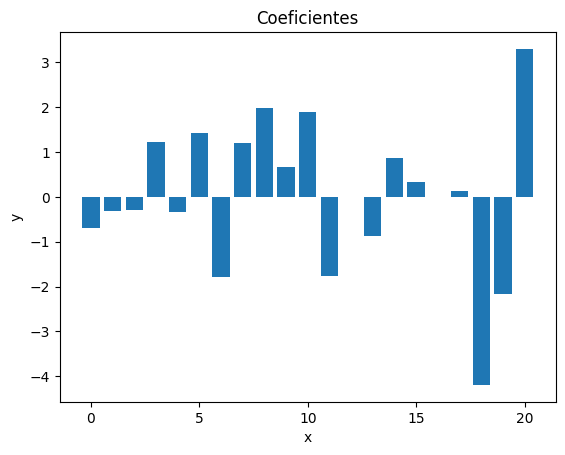

In [107]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [108]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.87330036, 0.61414019, 0.93821054, ..., 0.        , 0.        ,
        0.        ],
       [0.91316265, 0.47684361, 0.94899823, ..., 0.        , 0.        ,
        0.66666667],
       [0.9246584 , 0.42727929, 0.93879116, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.91400573, 0.68083208, 0.91025728, ..., 0.        , 0.        ,
        0.        ],
       [0.90080125, 0.67385834, 0.93756986, ..., 0.        , 0.        ,
        0.        ],
       [0.89284748, 0.72395514, 0.92458897, ..., 0.        , 0.        ,
        0.        ]])

In [109]:
X_test.shape

(4906, 21)

In [110]:
predictions = model.predict(X_test)

In [111]:
test["predictions"]=predictions
test

,distancias,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,sumas_t,...,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases,predictions
0,1.269651,0.806697,3.811686,0.005501,0.190288,0.084758,4.041253,0.003165,0.448079,0.160300,...,1.000000,0.500000,5,0.375000,0.232775,0,0,0.000000,CONTRADICTION,0
1,1.327605,0.626353,3.855514,0.005729,0.118164,0.051589,4.217714,0.002422,0.578176,0.157771,...,0.863121,0.285714,7,0.571429,0.249111,0,0,0.666667,CONTRADICTION,0
2,1.344318,0.561248,3.814045,0.005747,0.096256,0.052614,4.088408,0.002828,0.490766,0.135732,...,0.863121,0.285714,7,0.428571,0.412795,0,0,0.333333,CONTRADICTION,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.683008,0.000000,1.000000,0.184760,...,0.000000,0.000000,8,1.000000,0.000000,0,0,1.000000,ENTAILMENT,1
4,1.360140,0.611604,3.978109,0.006914,0.074974,0.029070,4.574526,0.000698,0.867853,0.180280,...,0.591673,0.142857,7,0.857143,0.277387,0,0,0.833333,CONTRADICTION,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,1.330689,0.766763,3.803848,0.005847,0.114092,0.033093,4.076415,0.003201,0.335569,0.096200,...,0.811278,0.750000,5,0.250000,0.174667,0,0,0.250000,CONTRADICTION,0
4902,1.368506,0.732650,3.769402,0.005909,0.063093,-0.001446,3.770053,0.004144,0.122140,0.023929,...,1.000000,0.500000,5,0.250000,0.157848,0,0,0.000000,CONTRADICTION,0
4903,1.328831,0.894299,3.698120,0.005845,0.112530,0.024140,3.697886,0.004207,0.101417,0.024478,...,1.370951,0.800000,4,0.000000,0.014334,0,0,0.000000,CONTRADICTION,0
4904,1.309634,0.885139,3.809083,0.006834,0.142375,0.071880,3.848196,0.004763,0.146788,0.063966,...,1.298795,0.750000,6,0.125000,0.036298,0,0,0.000000,CONTRADICTION,0


In [112]:
test[(test["clases"]=="ENTAILMENT") & (test["predictions"]==0)]

,distancias,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,sumas_t,...,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases,predictions
9,0.985034,0.602120,3.806307,0.008551,0.514878,0.122525,4.567073,0.001075,0.919146,0.185405,...,0.650022,0.166667,6,1.000000,0.998903,0,0,0.800000,ENTAILMENT,0
17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.682331,0.000000,1.000000,0.296593,...,0.000000,0.000000,7,0.500000,0.000000,0,0,0.400000,ENTAILMENT,0
18,0.910599,0.736671,3.696841,0.003618,0.585392,0.251978,4.517777,0.000662,0.930899,0.234347,...,0.650022,0.166667,7,0.833333,1.156391,0,0,0.666667,ENTAILMENT,0
24,0.999999,0.513995,3.885459,0.004431,0.087943,0.043841,4.522133,0.000656,0.817589,0.218810,...,0.721928,0.200000,5,0.800000,0.659721,0,0,1.000000,ENTAILMENT,0
39,1.306036,0.514578,3.785758,0.006490,0.147189,0.045850,4.539265,0.000621,0.893399,0.170838,...,0.591673,0.125000,8,0.875000,0.477803,0,0,0.400000,ENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,1.164532,0.970350,3.820276,0.004483,0.312808,0.119885,4.240598,0.001699,0.706449,0.168658,...,1.061278,0.250000,7,0.750000,0.383071,0,0,0.600000,ENTAILMENT,0
4763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.463848,0.001533,0.845575,0.287054,...,0.000000,0.000000,3,1.000000,0.000000,0,0,0.500000,ENTAILMENT,0
4769,1.167059,0.592736,4.011932,0.005138,0.318978,0.190247,4.569281,0.001077,0.829745,0.253384,...,0.811278,0.250000,4,1.000000,1.103759,0,0,0.666667,ENTAILMENT,0
4772,1.104512,0.797787,3.857504,0.005130,0.390022,0.111367,4.144079,0.003205,0.580522,0.131866,...,0.811278,0.250000,9,0.750000,0.428306,0,0,0.333333,ENTAILMENT,0


In [113]:
#test.to_csv("predictions_SICK_DEV.csv")

In [114]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[ 768  636]
 [ 243 3259]]


In [85]:
# [[ 677  727]
#  [ 188 3314]]
# [[ 902  502]
#  [ 432 3070]]
# acccuracy:  0.81
# precision:  0.78
# recall 0.48
# f1_score:  0.6
# matthews_score:  0.51

In [115]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.82
precision:  0.76
recall 0.55
f1_score:  0.64
matthews_score:  0.53


In [116]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="micro"),2))
print("recall",round(recall_score(y_test,predictions,average="micro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="micro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.82
precision:  0.82
recall 0.82
f1_score:  0.82
matthews_score:  0.53


In [117]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="macro"),2))
print("recall",round(recall_score(y_test,predictions,average="macro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="macro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.82
precision:  0.8
recall 0.74
f1_score:  0.76
matthews_score:  0.53


In [118]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.82
precision:  0.81
recall 0.82
f1_score:  0.81
matthews_score:  0.53


In [119]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="binary"),2))
print("recall",round(recall_score(y_test,predictions,average="binary"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="binary"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.82
precision:  0.76
recall 0.55
f1_score:  0.64
matthews_score:  0.53


In [120]:
X_train.shape

(4439, 21)

In [121]:
X_test.shape

(4906, 21)

In [122]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [123]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [124]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.800000 (0.019582)
Logistic Regression Precision:: 0.800000 (0.019967)
Logistic Regression Recall:: 0.800000 (0.019582)
Logistic Regression F1-score:: 0.800000 (0.019936)


In [125]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.760000 (0.031070)
Logistic Regression Recall:: 0.740000 (0.030529)
Logistic Regression F1-score:: 0.750000 (0.029341)


In [126]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.660000 (0.071461)
Logistic Regression Recall:: 0.610000 (0.066378)
Logistic Regression F1-score:: 0.630000 (0.057066)


In [127]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.800000 (0.019582)
Logistic Regression Recall:: 0.800000 (0.019582)
Logistic Regression F1-score:: 0.800000 (0.019582)


In [128]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.500000 (0.058667)


In [131]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [125]:
#linear_model

In [126]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [130]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3502
           1       0.76      0.55      0.64      1404

    accuracy                           0.82      4906
   macro avg       0.80      0.74      0.76      4906
weighted avg       0.81      0.82      0.81      4906



In [ ]:
#               precision    recall  f1-score   support

#            0       0.85      0.89      0.87      3502
#            1       0.69      0.62      0.66      1404

#     accuracy                           0.81      4906
#    macro avg       0.77      0.76      0.76      4906
# weighted avg       0.81      0.81      0.81      4906

In [133]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [135]:
test.columns[:-2]

Index(['distancias', 'entropias', 'mutinf', 'mearts', 'max_info', 'sumas',
       'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t', 'list_comp',
       'diferencias', 'list_incomp', 'entropia_relaciones', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [136]:
explainer.expected_value

-1.3898848642423083

In [137]:
X_test

array([[0.87330036, 0.61414019, 0.93821054, ..., 0.        , 0.        ,
        0.        ],
       [0.91316265, 0.47684361, 0.94899823, ..., 0.        , 0.        ,
        0.66666667],
       [0.9246584 , 0.42727929, 0.93879116, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.91400573, 0.68083208, 0.91025728, ..., 0.        , 0.        ,
        0.        ],
       [0.90080125, 0.67385834, 0.93756986, ..., 0.        , 0.        ,
        0.        ],
       [0.89284748, 0.72395514, 0.92458897, ..., 0.        , 0.        ,
        0.        ]])

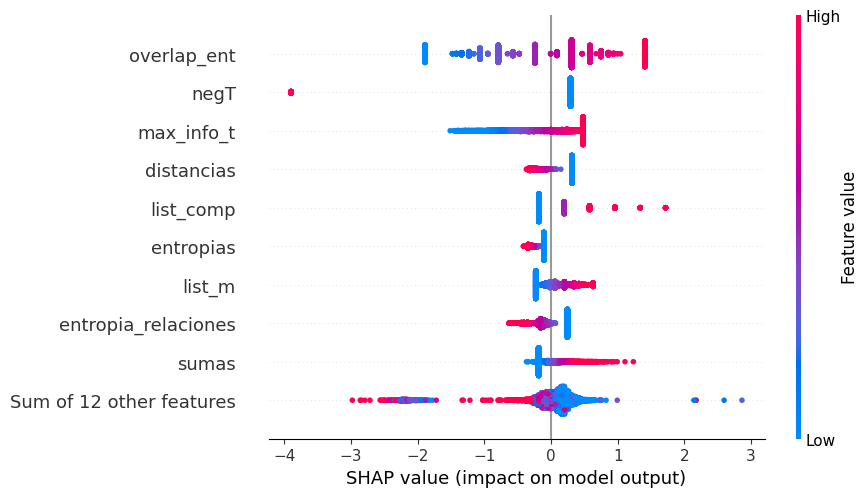

In [138]:
shap.plots.beeswarm(shap_values)

[0.73155818 0.60428422 0.93092276 0.10731264 0.445486   0.35530085
 0.8375496  0.21256247 0.58725685 0.305726   0.4        0.0952381
 0.         0.45914792 0.33333333 0.4        0.66666667 0.16620802
 0.         0.         0.25      ] 0 0


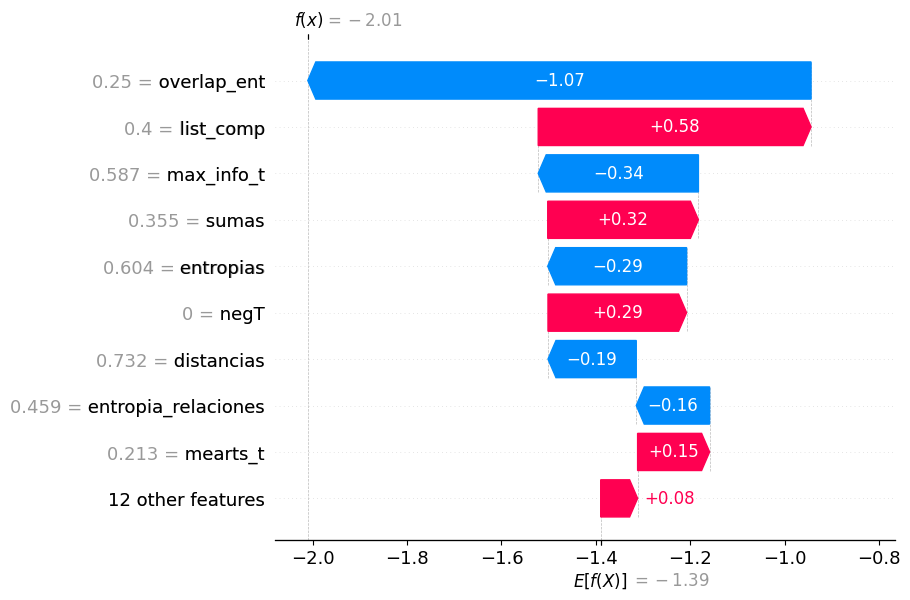

In [139]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [140]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.91739828 0.58508393 0.95346608 0.16914902 0.11750908 0.08057585
 0.85470472 0.22051327 0.4067985  0.15215869 0.         0.08163265
 0.         0.45914792 0.66666667 0.46666667 0.33333333 0.06419812
 0.         0.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

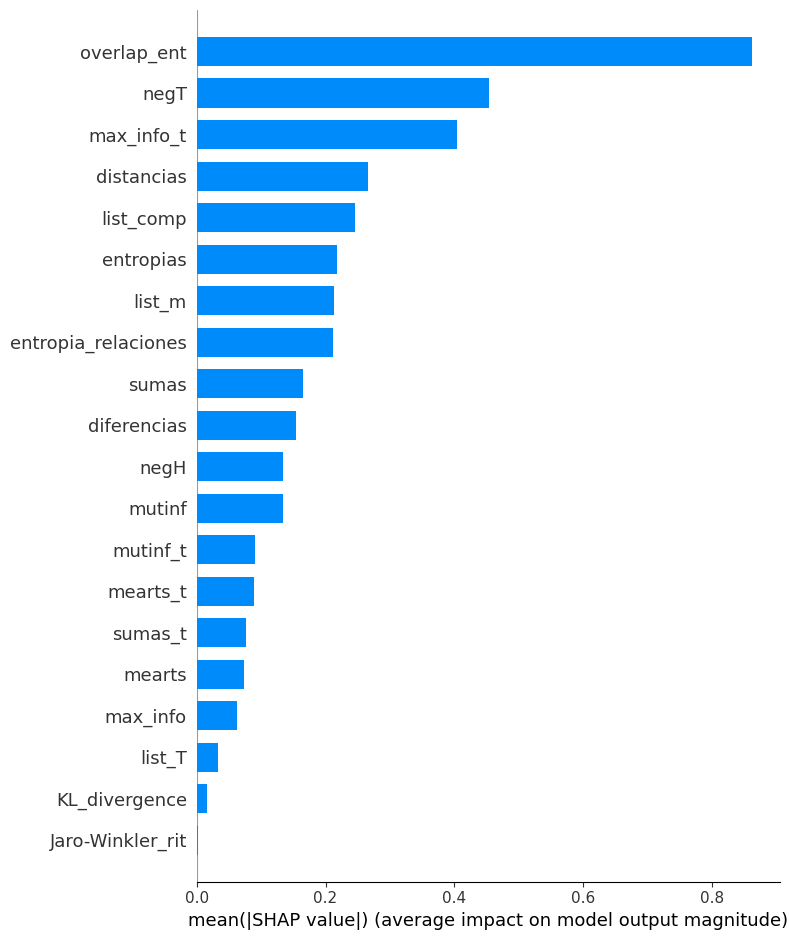

In [141]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

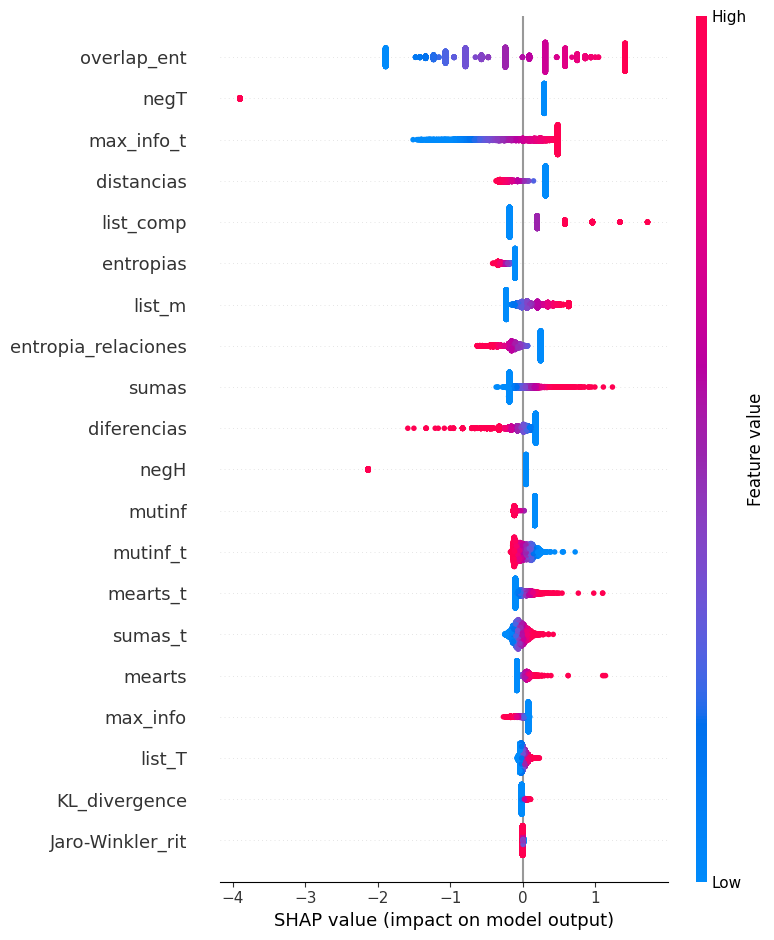

In [142]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

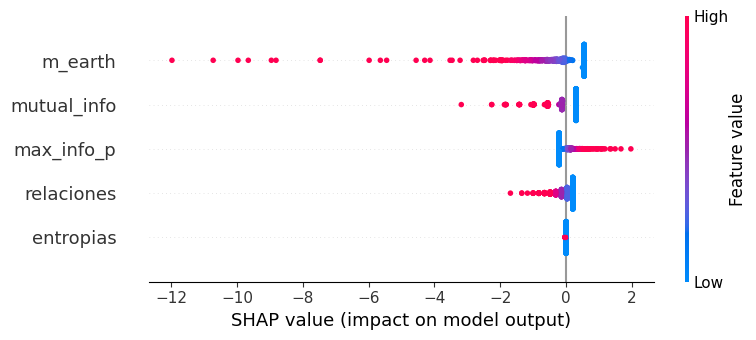

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

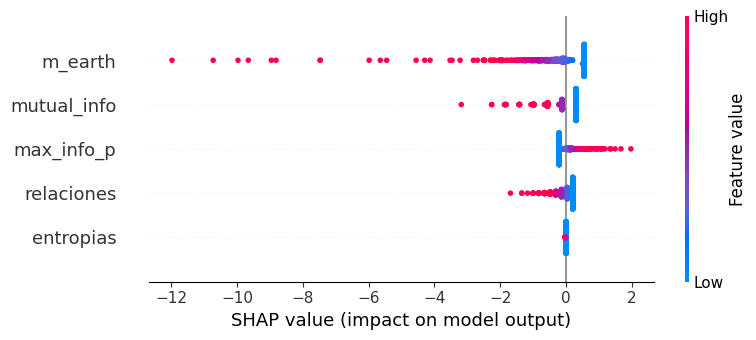

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [84]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [85]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.78
precision:  0.61
recall 0.69
f1_score:  0.65
matthews_score:  0.49


In [86]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [87]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.670000 (0.048836)
DecisionTree: 0.660000 (0.035226)
DecisionTree: 0.670000 (0.033797)


In [88]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[2874,  628],
       [ 434,  970]])

Profundidad del árbol: 29
Número de nodos terminales: 1014


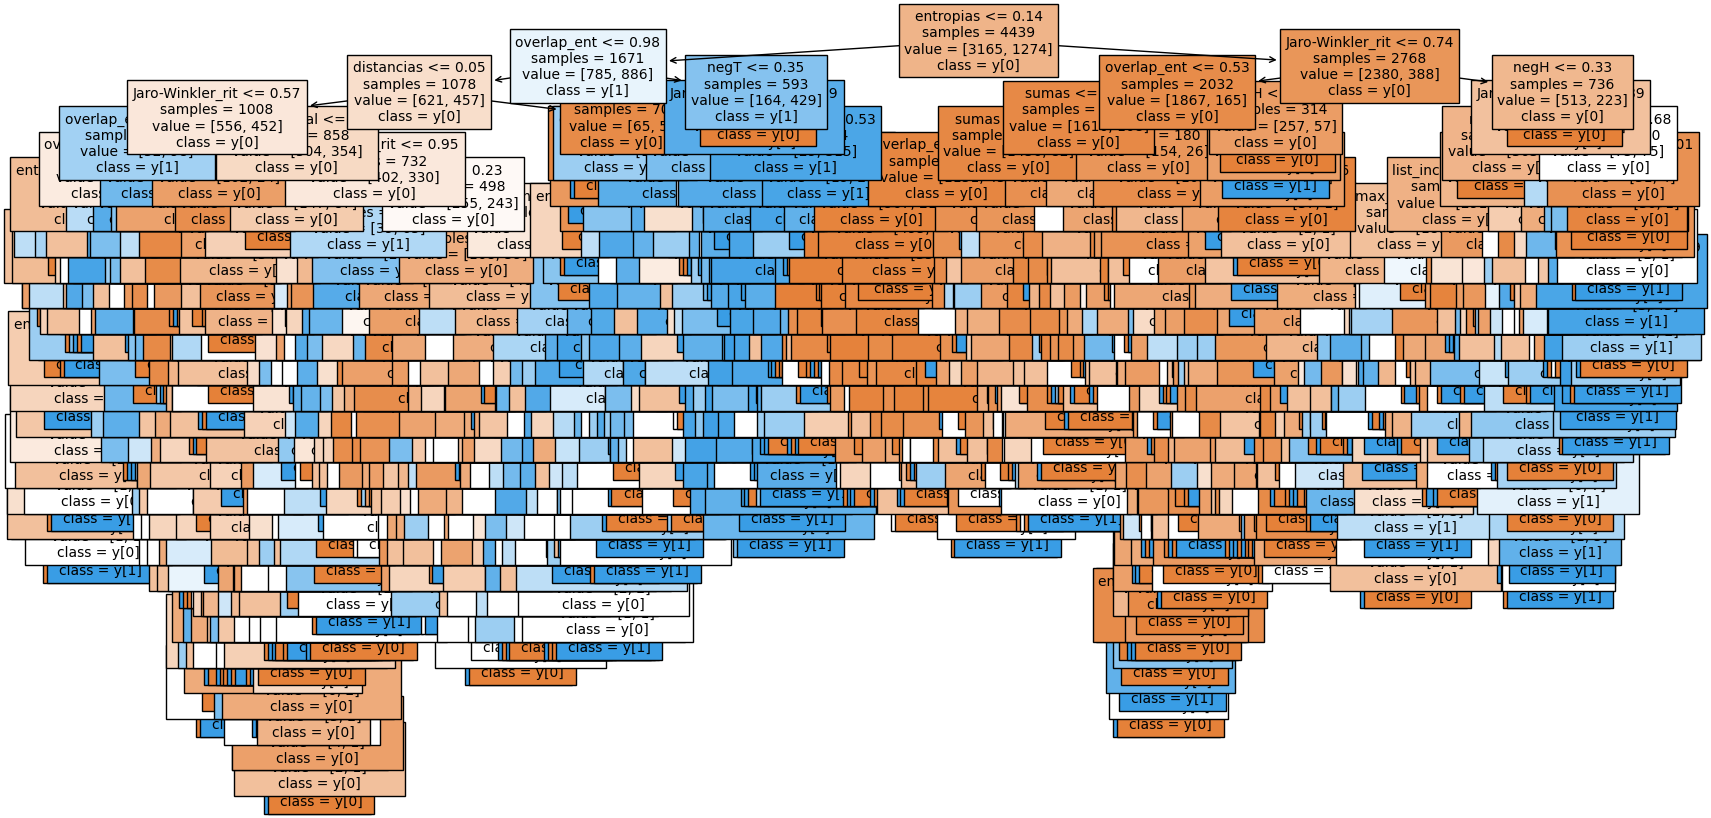

In [89]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )